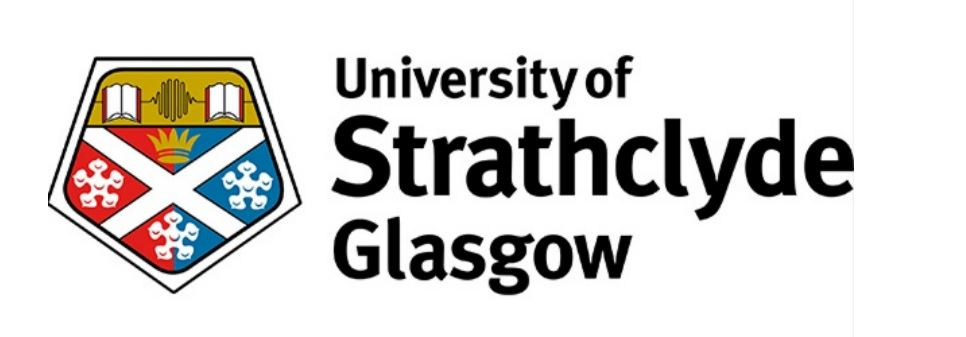

# ***CS985 Spotify Regression Problem 2024***

**TEAM NAME:CS985 Group 11**
1.   Deepali Yadav
2.   Fatemah Ashkanani
3.   Linu Roby
4.   Ohud Alghamdi
5.   Teerachaya Lhaeman

### **Install/Import of required libraries**

From the first look of data, there are categorical columns which will need to be converted to numeric columns for better handling and modelling. The library Category Encoders is installed for this purpose.

In [ ]:
pip install category_encoders

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to create various plots
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for scaling of numeric columns
from category_encoders.target_encoder import TargetEncoder # for encoding categorical columns
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.svm import SVR # Support Vector Regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error # for model evaluation
from scipy import stats # for outlier detection

# **Goal - Prediction of popularity of song**
The training set CS98XRegressionTrain.csv is provided with 15 columns. The target feature is column 'pop'. The testing set provided is CS98XRegressionTest.csv with similar columns except 'pop' column. In this notebook, we will be training a machine learning model to predict the popularity score('pop') of the songs in test

## **Model description and Solution**
The final model which was used in this machine learning was Random Forest Regressor model. The provided dataset was noisy and contained features like artist, danceability, loudness, energy, etc.Through data preprocessing and visualisation, the least correlated features and outliers were identified. The missing data values were handled and irrevelant features were imputated.
As there are categorical and numerical features, proper scaling and encoding was done for normalisation of data.

The data was split to training and testing to feed to the algorithm for learning. Random Forest is a powerful and popular ensemble method. This has given higher performance than the individual Decision tree regressor model. Random forest works on multiple deicision trees. Each tree gets trained on different subset of training data. Their predictions are then combined to get the final prediction. This method is effective for handling non linear relationships in data.

Finally the models were evaluated to see how well they performed on unseen data. Root Mean Sqaure metrics was used for this. At the end, the selected model was fed with the test data and the predictions were obtained.

## **Import data from the given sets to panda dataframe**.

In [ ]:
# Read training data from the csv file
data_train = pd.read_csv("CS98XRegressionTrain.csv")
# Load the csv for predicting
data_test = pd.read_csv("CS98XRegressionTest.csv")
# View the first 5 rows of training dataset
data_train.head(2)

## **Exploratory Data Analysis (EDA)**

Id column is just an identifier column for the records in the dataset. This clearly doesnot influence in the prediction of popularity score. In the same way, title is for each song and by intuition, I have dropped this column too. The column 'artist' may have some influence in the prediction but this is a categorical column with many values. Including this for data analysis will be computationally challenging and hence this is dropped too.

In [ ]:
# There are some columns which will not be used and can be dropped
data_train = data_train.drop(columns=['Id','artist','title'])
data_train.head(2)

Lets view a statistical summary of the dataset. This provides count, mean, standard deviation, etc for each columns.

In [ ]:
# View the statistical values
data_train.describe()

Having null values in the data can affect prediction and performance of the model. To handle this, rows with null values could be removed(imputation). But since the provided data is already small scale, removing further rows will further reduce the amount of data from which the model can learn. Here we have decided to retain these rows and fill with random values sampling.

In [ ]:
# Check for null values
data_train.isnull().sum()
# There are 15 rows with null values for topgenre

In [ ]:
# Replace the null vlaues with random sampling
topgenre_values = data_train['top genre'].dropna().unique()
data_train['top genre'].fillna(np.random.choice(topgenre_values), inplace=True)
data_train.isnull().sum()

View more information about the column entities and see the columns which are numerical and categorical based on their datatypes.

In [ ]:
# Check the type of data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   top genre  453 non-null    object
 1   year       453 non-null    int64 
 2   bpm        453 non-null    int64 
 3   nrgy       453 non-null    int64 
 4   dnce       453 non-null    int64 
 5   dB         453 non-null    int64 
 6   live       453 non-null    int64 
 7   val        453 non-null    int64 
 8   dur        453 non-null    int64 
 9   acous      453 non-null    int64 
 10  spch       453 non-null    int64 
 11  pop        453 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 42.6+ KB


**Data Visualisation**

Visualise the correlation between columns using seaborn heatmap. From the below color scales in the heatmap, we inferrred that energy(nrgy),danceability(dnce),loudness(dB) and duration(dur) of song are having a positive correlation with the popularity.

<ipython-input-10-46ad352ea5e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


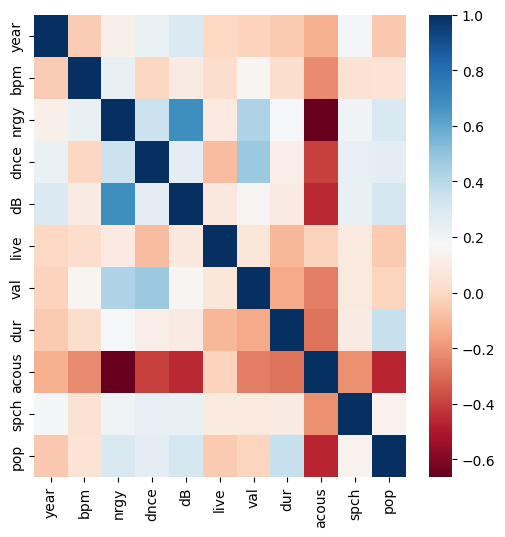

In [ ]:
corr = data_train.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,cmap='RdBu')
plt.show()

**Outliers**

Check for outliers in the data. These can inversely affect the learning model. From the below code, there are significant outliers detected in liveness(live), duration(dur) and speechiness(spch). Setting a threshold of 0.99999, the count of outliers are analysed which is not very significant. We will be using models which will be robust to outliers.

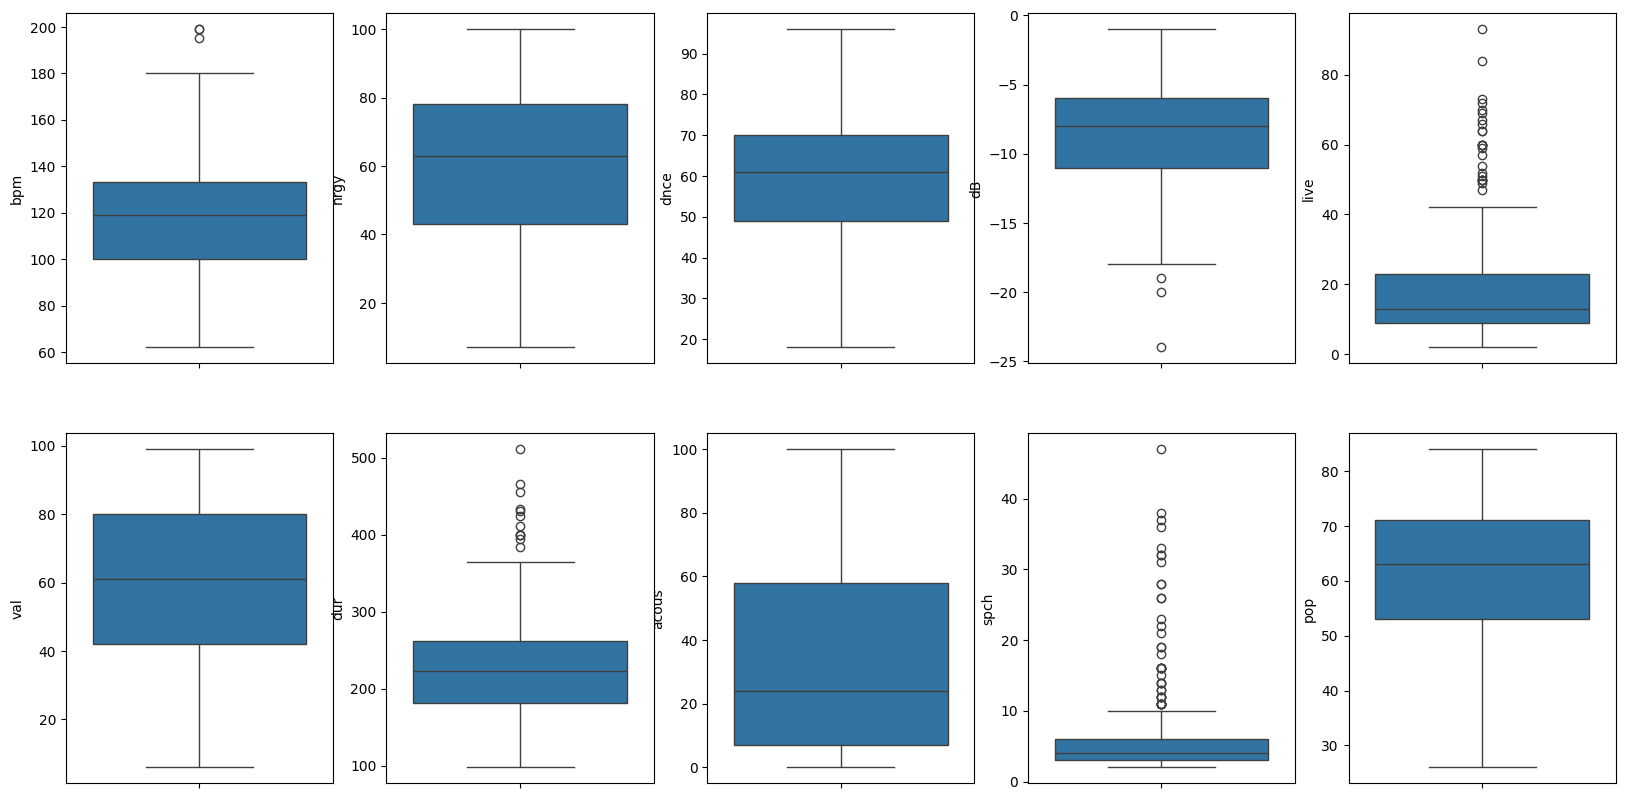

In [ ]:
# Plot the data to check for outliers
train_numcols = data_train[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']]
plt.figure(figsize=(20, 10))
for i in range (len(train_numcols)):
  try:
      plt.subplot(2, 5, i + 1)
      sns.boxplot(train_numcols.iloc[:, i])
  except ValueError:
      pass
plt.show()

In [ ]:
# Outliers detected in bpm,dB,live,dur and spch. Get the count of outliers
train_numcols = train_numcols.copy()
# Set a threshold % and get zscore
thresh_zscore = stats.norm.ppf(0.99999)
# Get zscore for each value in data
z_data = pd.DataFrame(np.abs(stats.zscore(train_numcols)), columns=train_numcols.columns)
print((z_data>thresh_zscore).sum(axis=0))

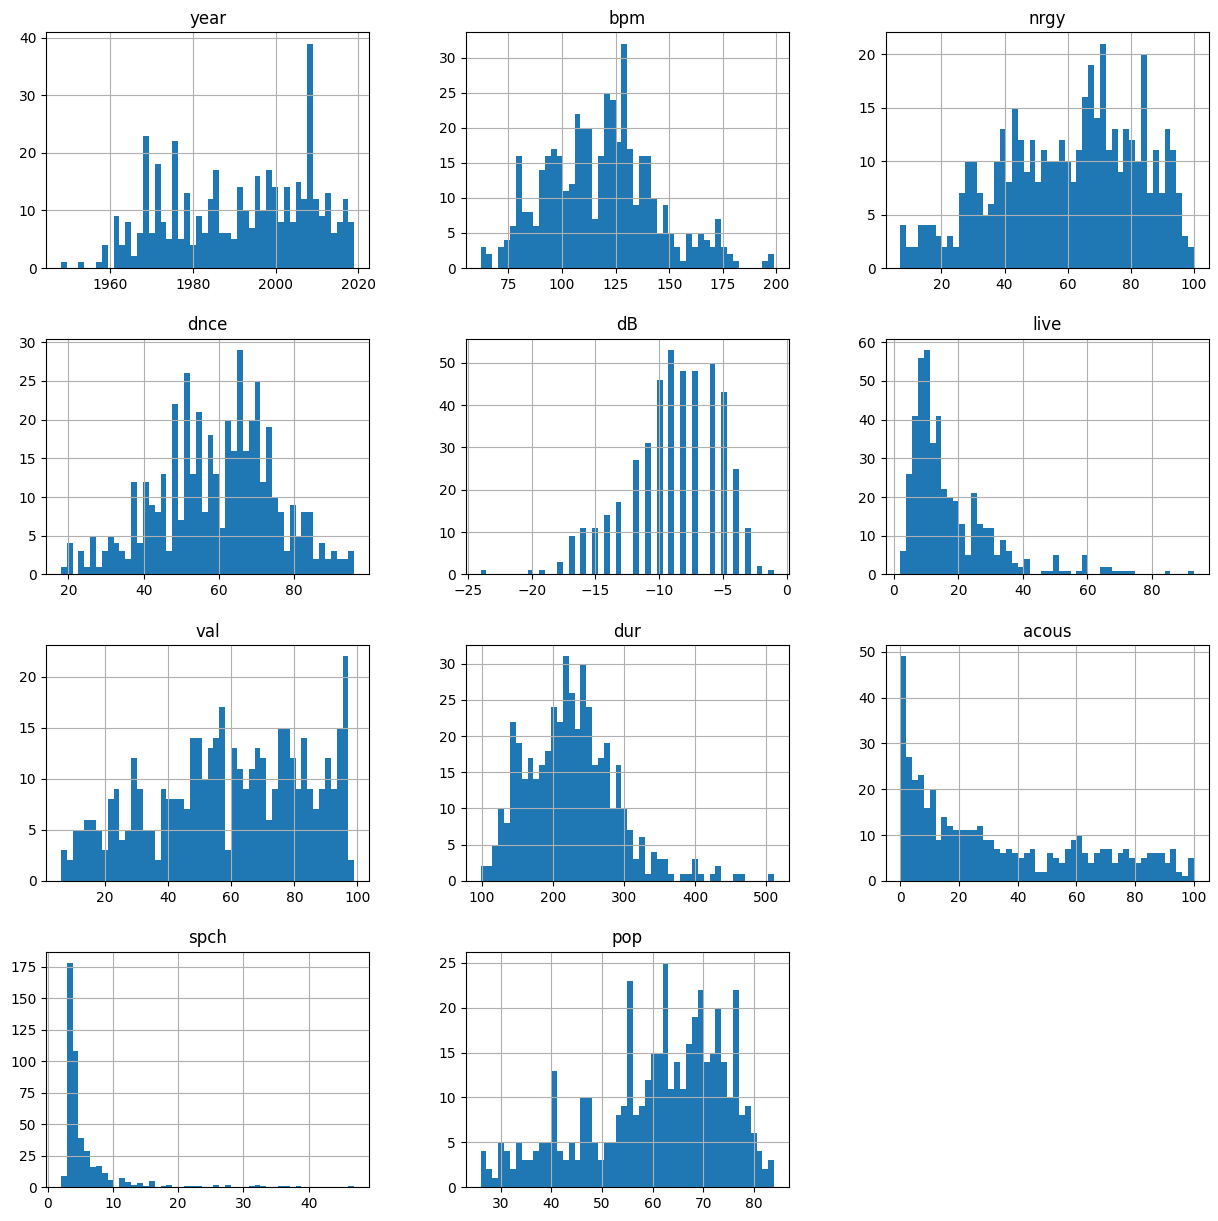

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data_train.hist(bins=50, figsize=(15,15))
plt.show()

### **Data Scaling**
From the statistical view of data, the mean and standard deviation are not 0 and 1 respectively. The data is a scaled so that the numerical values are transformed to a common scale. By scaling, we made sure, the mean and standard deviation are close to 0 and 1 respectively.
The data is split into training and testing data and scaling is applied separately. This is done for the model to generalize well with unseen data. However the same scaler should be used for training and testing.

In [ ]:
# Split training excel data into xtrain and ytrain to do scaling and encoding
X = data_train.drop(columns=['pop'])
Y = data_train['pop']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Check data distribution of training and test data in X (80% training and 20% testing)
print(X_train.shape,X_test.shape)

In [ ]:
# Get the numerical columns for scaling
num_columns = ['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch']
# Retrieve the numerical columns from xtrain and xtest
X_train_numerical = X_train[num_columns]
X_test_numerical = X_test[num_columns]
# StandardScaler is used for scaling
scaler = StandardScaler()
# Training data is fitted and transformed using the scaler
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
# Testing data is transformed using the same scaler
X_test_numerical_scaled = scaler.transform(X_test_numerical)
# Replace the numerical columns in xtrain and xtest with the scaled values
X_train[num_columns] = X_train_numerical_scaled
X_test[num_columns] = X_test_numerical_scaled
# Check the mean and std to verify proper scaling is done (close to 0 and 1 respectively)
print("mean X_train_numerical_scaled:",round(np.mean(X_train_numerical_scaled), 6))
print("sd X_train_numerical_scaled:",np.std(X_train_numerical_scaled))
print("mean X_test_numerical_scaled:",round(np.mean(X_test_numerical_scaled), 6))
print("sd X_test_numerical_scaled:",np.std(X_test_numerical_scaled))

### **Data Encoding**
We have dropped 2 categorical columns title and artist. There is still one categorical column 'top genre' which we are converting to numerical column using a Categorical Encoder. With one hot encoding, additional columns will be created with binary data. As the test csv is unseen and has different top genre values, there will be column mismatch and the model will fail. Hence we have used Target Encoding to convert the top genre categorical values to numerical values. The original column is replaced with the single encoded column.

In [ ]:
X_train_categorical = X_train[['top genre']]
X_test_categorical = X_test[['top genre']]
# Encode categorical columns to obtain numerical values
encoder = TargetEncoder()
# Fit and transform is done for train data
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical,Y_train)
# Test data will undergo only transfrom using the same encoder
X_test_categorical_encoded = encoder.transform(X_test_categorical)
# Replace the values with encoded values in top genre column
X_train[['top genre']] = X_train_categorical_encoded
X_test[['top genre']] = X_test_categorical_encoded

## **Model Training**
Due to the non linear relationships between features and target, we will be first using Support Vector Regression model with polynomial features to make the data linear. Inorder to avoid slowing down the model with higher degree, polynomial kernel is used here.

## Decision Tree Regressor
As we are dealing with non linear data, decision tree regression model was initially used. This will be a baseline model to compare with other models. From model evaluation, the root mean square seems to be high. In this case, we will explore more models to see if there is a better performance.

In [ ]:
# Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)
#Train the model with scaled and encoded training data
decision_tree.fit(X_train, Y_train)
# Predict on the test data
ytest_preds_dt = decision_tree.predict(X_test)
# Calculate RMSE to evaluate the model. Y_test is the actual value and ytest_preds_dt are the predicted values
lin_mse_test_dt = mean_squared_error(Y_test, ytest_preds_dt)
print("RMSE of testing data in Decision tree : ",np.sqrt(lin_mse_test_dt))

## Support Vector Regression(SVR)
Due to the non linear relationships between features and target, we will be using Support Vector Regression model with polynomial features to make the data linear. Inorder to avoid slowing down the model with higher degree, polynomial kernel is used here. The hypertuning parameters are adjusted to give the least error. The performance is better compared to Decision tree.

In [ ]:
# Support Vector Regression model
supportvector_reg = SVR(kernel="poly", degree=6, C=150, epsilon=0.01, gamma="scale")
# Model fitting
supportvector_reg.fit(X_train, Y_train)
# Prediction on test data
ytest_preds_sv = supportvector_reg.predict(X_test)
lin_mse_test_sv = mean_squared_error(Y_test, ytest_preds_sv)
print("RMSE of testing data in SVR : ",np.sqrt(lin_mse_test_sv))

## Ensemble : Random Forest Regressor
Inorder to increase the performance further, we will use Ensemble learning. In the below code, Random Forest (ensemble of decision trees) is used as the model. As dataset is having various features, this model will be a good choice to improve accuracy. Since this builds multiple decision trees, the performance will be improved compared to the single decision tree model.

In [ ]:
# Random Forest Regression model
random_model = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_split=7, max_features="sqrt", bootstrap=True, max_depth=9)
#Train the model with training data
random_model.fit(X_train, Y_train)
# Prediction on the testing set
ytest_preds_rf = random_model.predict(X_test)
# Y_test is the actual value and ytest_preds_rf are the predicted values
lin_mse_test_rf = mean_squared_error(Y_test, ytest_preds_rf)
print("RMSE of testing data in Random Forest: ",np.sqrt(lin_mse_test_rf))

In [ ]:
# Do Actual prediction on provided test data. Drop the columns not used in training
data_test_new = data_test.drop(columns=['Id','title','artist'])
data_test_categorical = data_test_new[['top genre']].copy()
# Encode the test data with same encoding done for training
data_test_categorical_encoded = encoder.transform(data_test_categorical)
data_test_new['top genre'] = data_test_categorical_encoded['top genre']
# Get the numerical columns for scaling
data_test_numerical = data_test_new[num_columns]
# Use the same scaler to tranform test data
data_test_numerical_scaled = scaler.transform(data_test_numerical)
data_test_new[num_columns] = data_test_numerical_scaled

# Final Predictions with Random Forest Model
prediction_rf = random_model.predict(data_test_new)
pred_rf__df = pd.DataFrame({'Id': data_test['Id'], 'pop': prediction_rf})
pred_rf__df['pop'] = pred_rf__df['pop'].astype(int)
# Print the predictions DataFrame
print(pred_rf__df)
pred_rf__df.to_csv("preds_RandomForest.csv", index=False)

## **Performance in Kaggle**
The files were downloaded and submitted.  The score varied with every run of the model due to the randomness of the model. With bootstrap, the different trees model on different subsets of the data. The best score was captured as below.

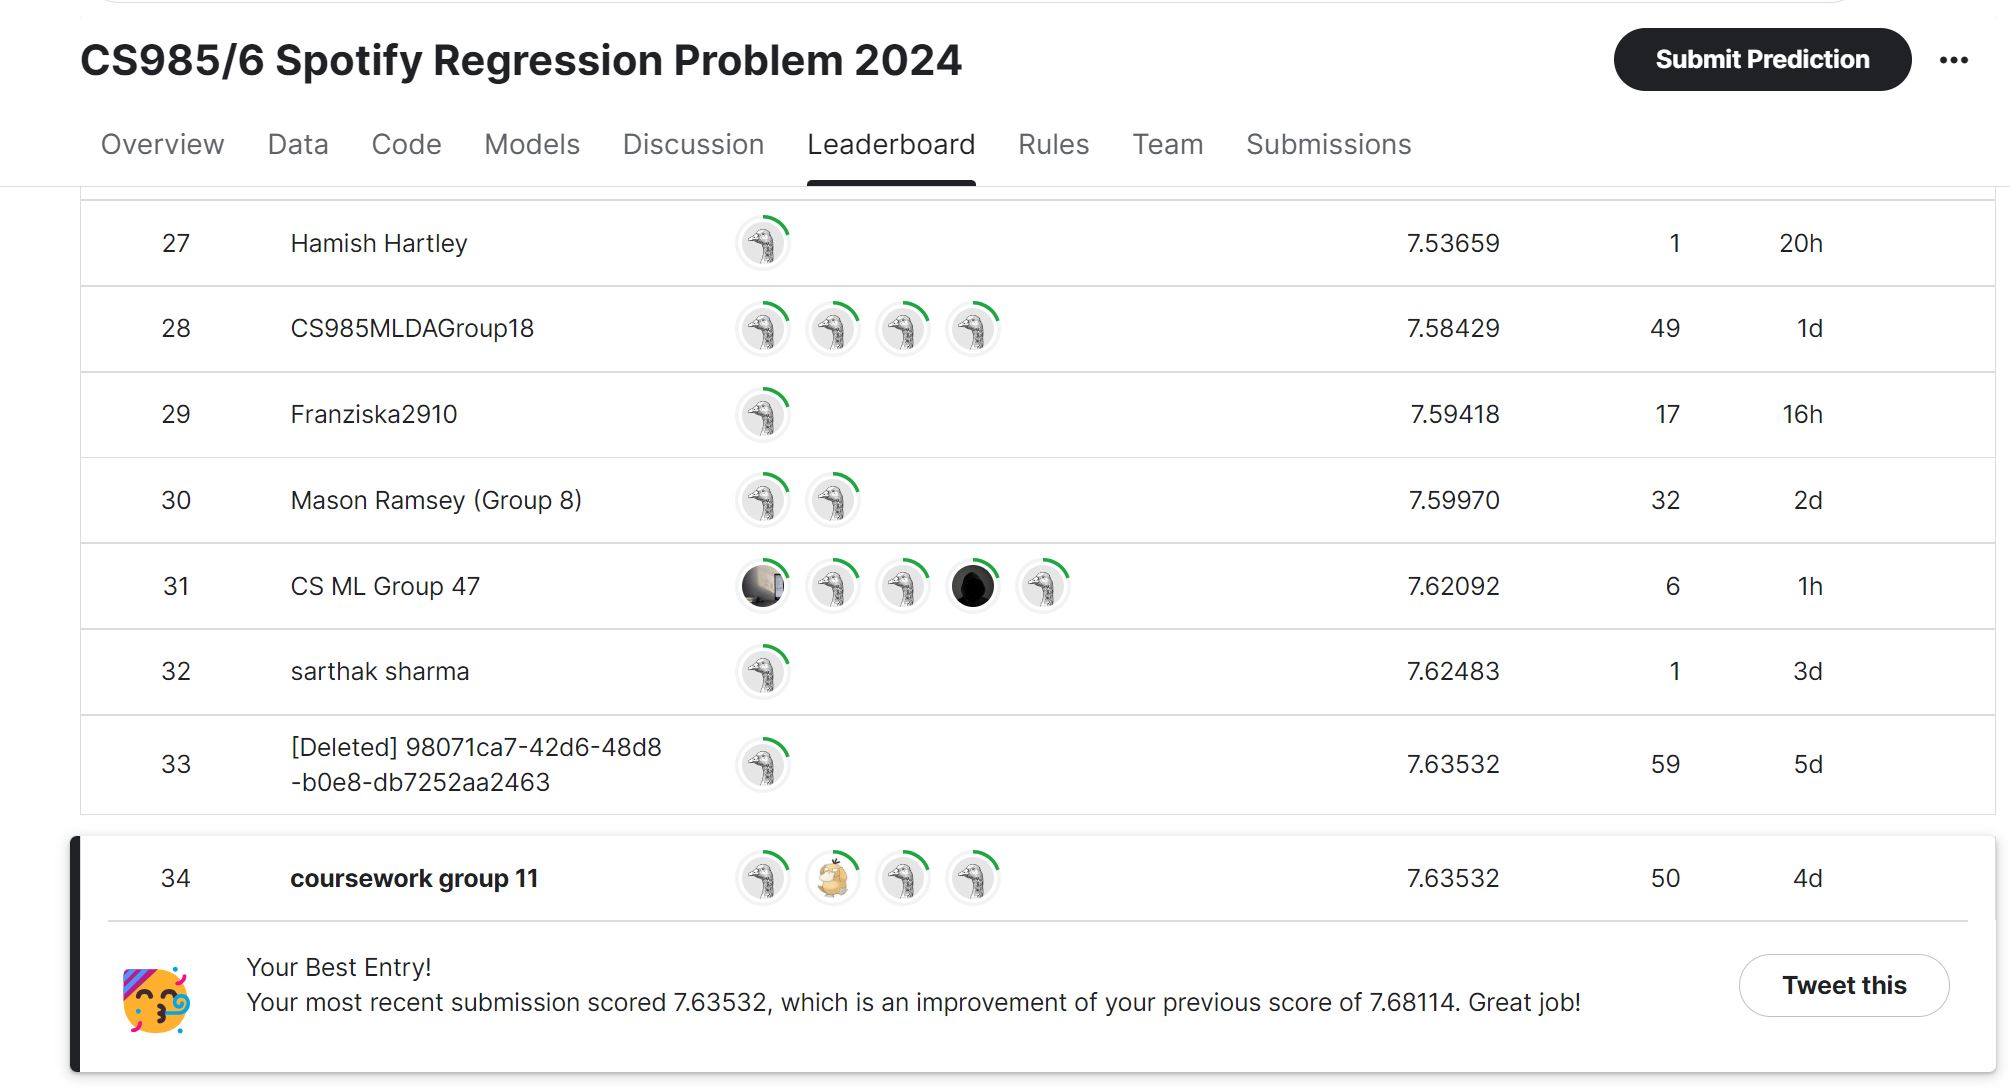

# **Conclusion**
It was concluded that Random forest performed better than the other models. The ensemble of Decision trees might have contributed to this effectiveness.